### We have data on the crowdfunding platform - Kickstarter

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('ks.csv', sep=";") #collecting data from the platform
Macro = pd.read_excel("macrofeatures.xlsx", engine="openpyxl") #Macroeconomic situation

In [3]:
data.head()

,Name,Category,Main_category,Currency,Deadline,Publication_data,State,Investor,Country,Collected_dollars,Target_dollars
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.00
1,Arcade County (Canceled),Games,Games,USD,2012-04-29,2012-03-30 23:40:45,canceled,5,US,71.00,9000.00
2,Hayashi Skate Co. Solar Skateboard backpack,Accessories,Fashion,CAD,2017-07-22,2017-05-23 23:00:13,canceled,8,CA,360.36,2391.77
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.00
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.00


In [4]:
Macro.head()

,Unnamed: 0,Close_brent,Close_sugar,Close_cereals,Close_index_moex,Close_index_moex_10,Close_index_RGBI,Close_index_RTS_oil_and_gas,Close_index_RTS_metallurgy,Close_index_RTS_consumer_sector,Close_index_RTS_telecom,Close_index_RTS_finance,Close_index_RTS_transport,Close_index_RTS_chemicals,Close_index_RTS_broad_market,Close_index_RTS_electricity,dlk_cob_date
0,0,34.41,13.97,442.75,1797.27,3940.81,125.59,123.40,111.97,196.55,70.17,140.57,27.06,177.38,530.59,32.49,2016-02-24
1,1,35.06,14.24,445.25,1803.89,3977.35,126.44,124.22,112.51,198.03,70.56,142.64,27.43,179.48,536.20,33.07,2016-02-25
2,2,35.13,14.00,443.25,1816.73,4027.23,126.90,125.38,113.44,200.13,71.94,145.45,28.06,181.56,544.73,33.55,2016-02-26
3,3,36.64,14.36,445.00,1840.17,4084.24,126.87,126.69,114.66,200.32,72.41,147.22,28.49,186.76,552.82,34.41,2016-02-29
4,4,36.60,14.39,438.50,1844.17,4087.06,127.78,129.72,117.09,204.30,74.26,150.04,30.12,190.67,565.45,34.96,2016-03-01


In [5]:
### Оставим только нужные состояния и переведем в таргет
data = data[data['State'].isin(['failed', 'successful'])]
data.loc[(data['State'] == 'failed'), 'target'] = 0
data['target'] = data['target'].fillna(1)
data = data.drop(columns=['State'])
data.head()

,Name,Category,Main_category,Currency,Deadline,Publication_data,Investor,Country,Collected_dollars,Target_dollars,target
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,23,US,600.00,600.0,1.0
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,20,US,502.00,10000.0,0.0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,62,US,2414.00,1400.0,1.0
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,86,US,10030.88,10000.0,1.0
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,0,US,0.00,10000.0,0.0


In [6]:
#Переведем в формат datetime
data['Deadline'] = pd.to_datetime(data['Deadline'])
data['Publication_data'] = pd.to_datetime(data['Publication_data'])

In [7]:
#Создадим колону срок
data['Term'] = (data['Deadline'] - data['Publication_data']).dt.days

In [8]:
### Выделим год запуска проекта
data['Publication_year'] = data['Publication_data'].dt.year

In [9]:
Macro_brent = Macro[['Close_brent', 'dlk_cob_date']] #оставляем необходимую только две колонки, одна с датой а другая с экономическим показателем

In [10]:
data.loc[:, 'Publication_data'] = data['Publication_data'].dt.date.astype('datetime64[ns]')
Macro_brent.loc[:, 'dlk_cob_date'] = pd.to_datetime(Macro_brent['dlk_cob_date'])


C:\Users\79832\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [11]:
Macro_brent = Macro_brent[['Close_brent', 'dlk_cob_date']].drop_duplicates() #удалим дубликаты

In [12]:
#### Смерджим колонки
data = pd.merge(data,
         Macro_brent,
         left_on=['Publication_data'],
         right_on=['dlk_cob_date'],
         how='left')

In [13]:
data['Close_brent'].sort_values().min()# 

Macro_brent = Macro[['Close_brent', 'dlk_cob_date']] #оставляем необходимую только две колонки, одна с датой а другая с экономическим показателем

data['Close_brent'] = data['Close_brent'].fillna(34.41) #у нас не заполнились первые строки, заполним в ручную

In [14]:
data = data.sort_values('Publication_data') #отсортируем по дате публикации

In [15]:
data = data.drop(['Deadline','Publication_data','dlk_cob_date'], axis=1)

In [16]:
data

,Name,Category,Main_category,Currency,Investor,Country,Collected_dollars,Target_dollars,target,Term,Publication_year,Close_brent
176128,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,30,US,625.00,1000.00,0.0,39,2009,34.41
241929,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,3,US,22.00,80000.00,0.0,87,2009,34.41
244460,drawing for dollars,Illustration,Art,USD,3,US,35.00,20.00,1.0,8,2009,34.41
80845,Offline Wikipedia iPhone app,Software,Technology,USD,25,US,145.00,99.00,1.0,79,2009,34.41
181197,Pantshirts,Fashion,Fashion,USD,10,US,387.00,1900.00,0.0,28,2009,34.41
...,...,...,...,...,...,...,...,...,...,...,...,...
247730,Propeller Spring 2.0,Games,Games,EUR,36,AT,269.84,35.98,1.0,2,2017,34.41
318187,The Cowboy and The Spaceman: Android Collective+,Tabletop Games,Games,GBP,25,GB,544.77,271.03,1.0,4,2017,66.46
264474,The CHAMPS Are Here!,Apparel,Fashion,USD,6,US,202.00,200.00,1.0,3,2017,65.99
293634,Kill Them All!,Tabletop Games,Games,USD,7,US,265.00,250.00,1.0,1,2017,66.16


### EDA

Text(0.5, 1.0, 'target')

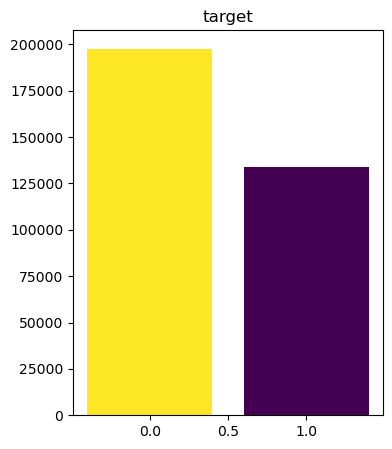

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(4, 5)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("viridis")

hist = data.groupby('target')['target'].count().sort_values()
ax_1 = fig.add_subplot(1,1,1)
plt.bar(hist.index, hist.values, color=my_cmap(rescale(hist.values)))
plt.xticks()
plt.title('target')



In [110]:
Count_1 = data[data['target']==1].shape[0]
Count_0 = data[data['target']==0].shape[0]
print(f'Count target 1 = {Count_1}')
print(f'Count target 0 = {Count_0}')
print(f'Rate = {Count_0 / Count_1:.3}')

Count target 1 = 133956
Count target 0 = 197719
Rate = 1.48


Text(0.5, 1.0, 'Category')

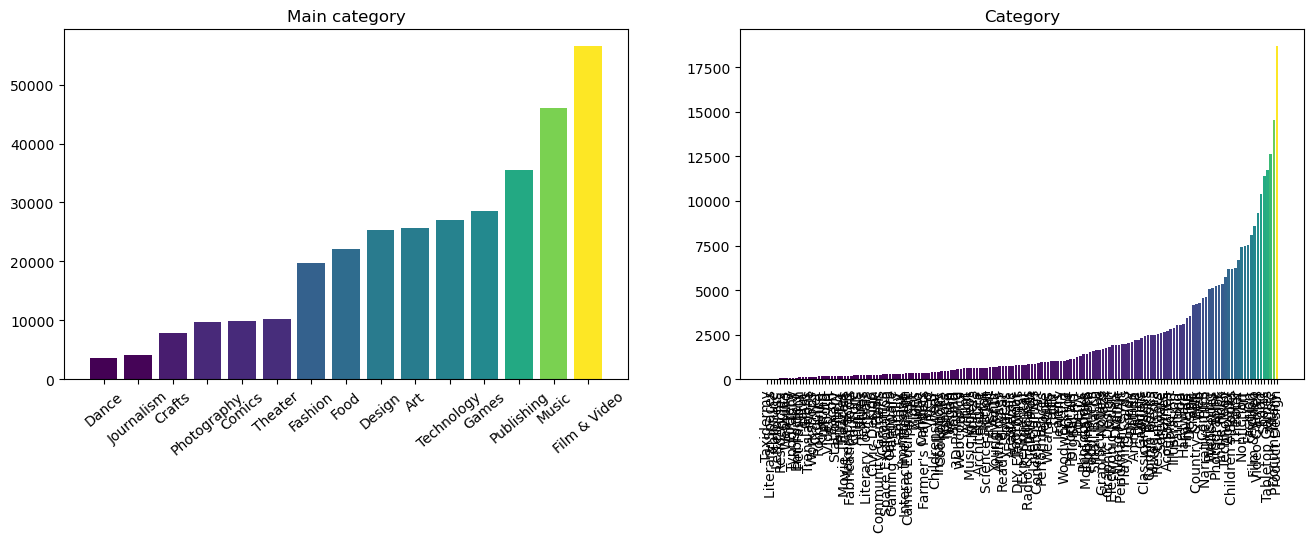

In [20]:
fig = plt.figure()
fig.set_size_inches(16, 10)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("viridis")

hist = data.groupby('Main_category')['Main_category'].count().sort_values()
ax_1 = fig.add_subplot(2,2,1)
plt.bar(hist.index, hist.values, color=my_cmap(rescale(hist.values)))
plt.xticks(rotation=40)
plt.title('Main category')

hist2 = data.groupby('Category')['Category'].count().sort_values()
ax_2 = fig.add_subplot(2,2,2)
plt.bar(hist2.index, hist2.values, color=my_cmap(rescale(hist2.values)))
plt.xticks(rotation=90)
plt.title('Category')


In [21]:
#check columns with Nan
data.isna().sum()

Name                 3
Category             0
Main_category        0
Currency             0
Investor             0
Country              0
Collected_dollars    0
Target_dollars       0
target               0
Term                 0
Publication_year     0
Close_brent          0
dtype: int64

In [22]:
data = data.drop(data[data.isnull().any(1)].index)

In [23]:
data.isna().sum()

Name                 0
Category             0
Main_category        0
Currency             0
Investor             0
Country              0
Collected_dollars    0
Target_dollars       0
target               0
Term                 0
Publication_year     0
Close_brent          0
dtype: int64

In [17]:
ratio_successful_failed = data \
    .groupby(['Main_category'])['target']\
    .agg(successful = lambda x: (x==1).sum(),
         failed = lambda x: (x==0).sum())

In [18]:
ratio_successful_failed['ratio_successful_failed'] = ratio_successful_failed.successful / ratio_successful_failed.failed
ratio_successful_failed = ratio_successful_failed.drop(columns=['successful','failed'])

In [19]:
ratio_successful_failed.head()

,ratio_successful_failed
Main_category,
Art,0.814521
Comics,1.447473
Crafts,0.370857
Dance,1.893117
Design,0.712164


In [20]:
user_data_new = data.merge(ratio_successful_failed, on='Main_category', how='inner')

In [21]:
#work with text
user_data_new['name_length'] = user_data_new['Name'].apply(lambda x: len(x) if isinstance(x, str) else x=='0')

In [22]:
user_data_new.head()

,Name,Category,Main_category,Currency,Investor,Country,Collected_dollars,Target_dollars,target,Term,Publication_year,Close_brent,ratio_successful_failed,name_length
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,30,US,625.0,1000.0,0.0,39,2009,34.41,0.394373,59
1,Pantshirts,Fashion,Fashion,USD,10,US,387.0,1900.0,0.0,28,2009,34.41,0.394373,10
2,Shirt Design by Kevin Cornell - Limited Run of...,Fashion,Fashion,USD,7,US,225.0,1600.0,0.0,88,2009,34.41,0.394373,50
3,The Square Project,Fashion,Fashion,USD,54,US,6862.0,5000.0,1.0,48,2009,34.41,0.394373,18
4,Tees for the Literate,Fashion,Fashion,USD,4,US,150.0,1500.0,0.0,59,2009,34.41,0.394373,21


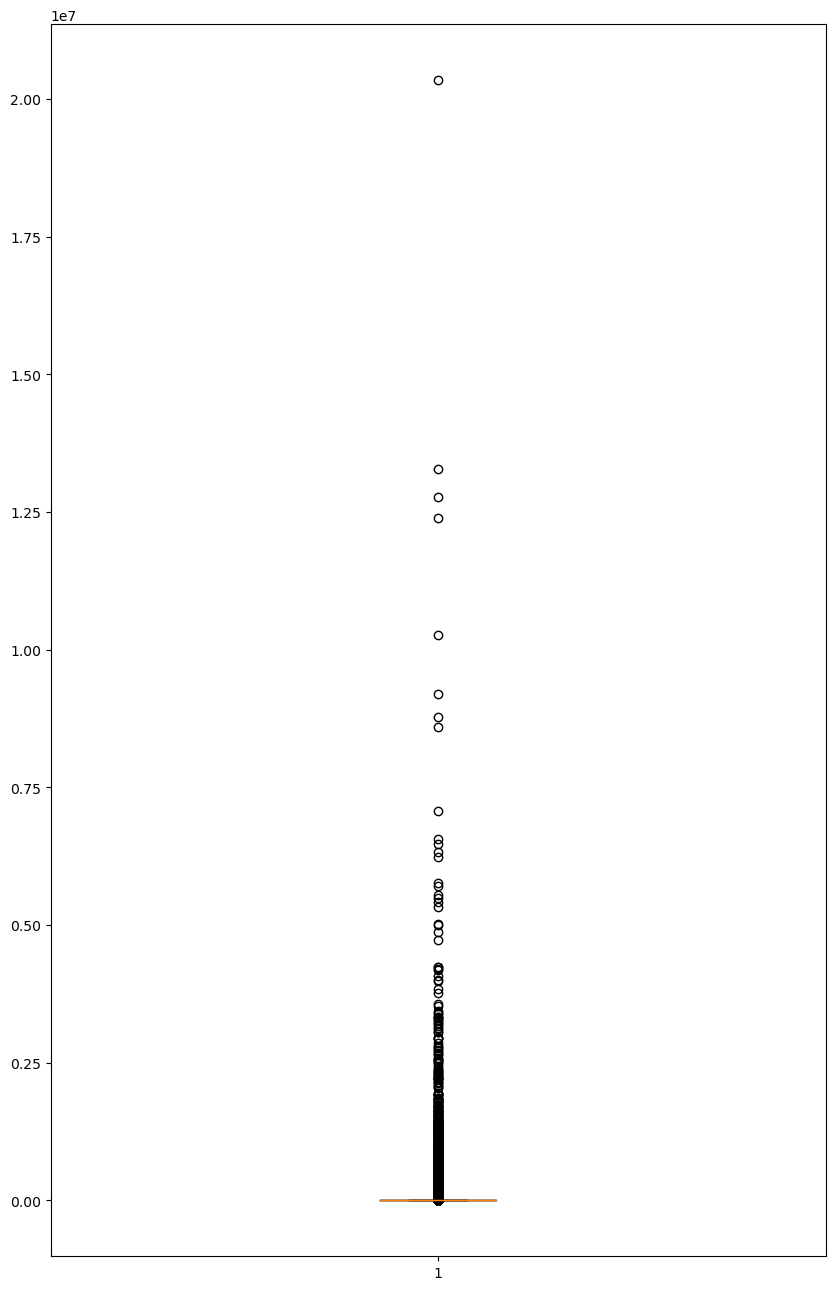

In [23]:
### Нарисуем ящик с усами
from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(user_data_new['Collected_dollars'].values)

plt.show()


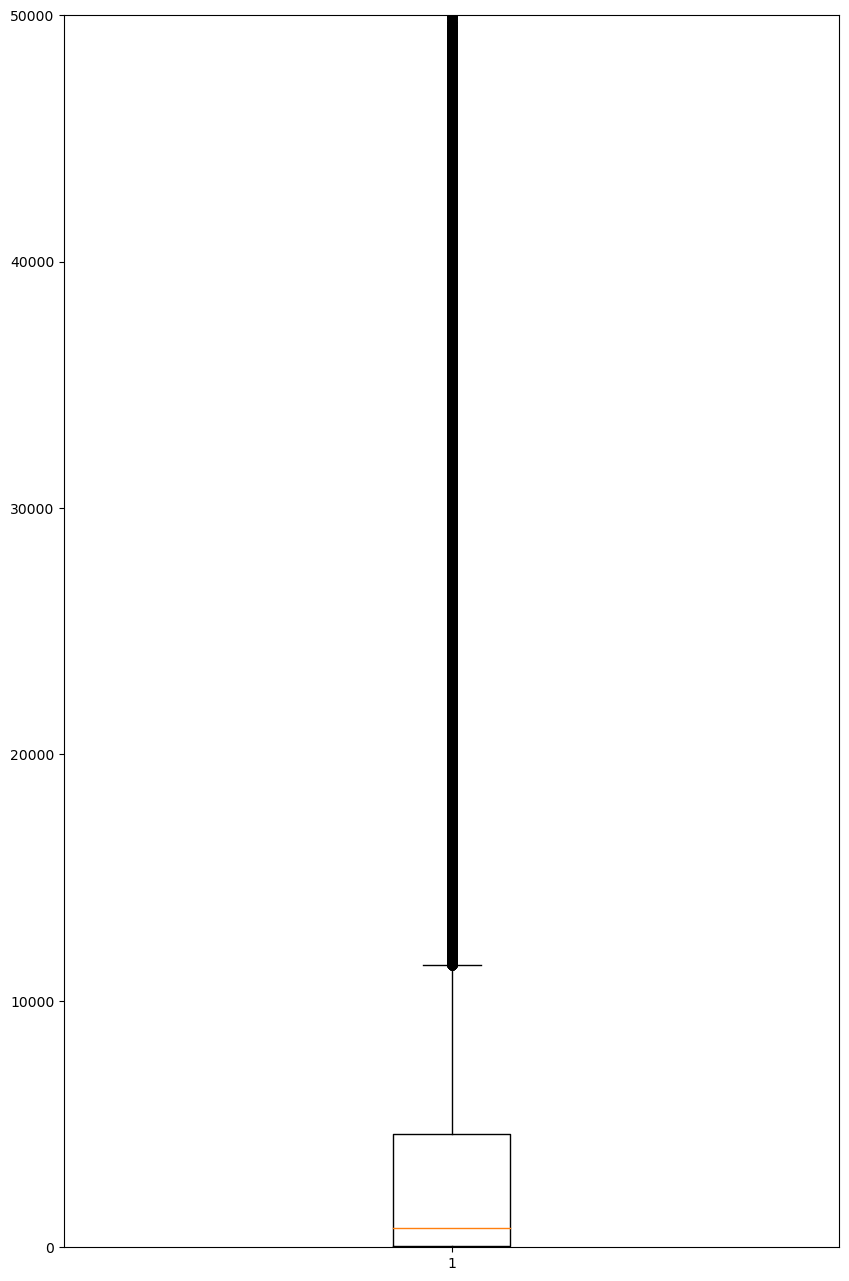

In [24]:

from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(user_data_new['Collected_dollars'].values)
plt.ylim(0, 50000)

plt.show()

In [25]:
q_low = user_data_new['Collected_dollars'].quantile(0.25)
q_high = user_data_new['Collected_dollars'].quantile(0.75)
tentacle_length = q_high - q_low

upper_tentacle = q_high + 3 * tentacle_length

In [26]:
user_data_new = user_data_new[user_data_new['Collected_dollars']<upper_tentacle]

In [27]:
user_data_new = user_data_new.drop(columns = ['Investor', 'Name', 'Collected_dollars', 'Target_dollars'])

In [28]:
user_data_new

,Category,Main_category,Currency,Country,target,Term,Publication_year,Close_brent,ratio_successful_failed,name_length
0,Fashion,Fashion,USD,US,0.0,39,2009,34.41,0.394373,59
1,Fashion,Fashion,USD,US,0.0,28,2009,34.41,0.394373,10
2,Fashion,Fashion,USD,US,0.0,88,2009,34.41,0.394373,50
3,Fashion,Fashion,USD,US,1.0,48,2009,34.41,0.394373,18
4,Fashion,Fashion,USD,US,0.0,59,2009,34.41,0.394373,21
...,...,...,...,...,...,...,...,...,...,...
331670,Dance,Dance,GBP,GB,0.0,29,2017,62.63,1.893117,51
331671,Spaces,Dance,USD,US,1.0,31,2017,62.63,1.893117,16
331672,Performances,Dance,USD,US,1.0,29,2017,63.73,1.893117,25
331673,Performances,Dance,USD,US,1.0,29,2017,63.73,1.893117,50


In [29]:
categorical_columns = user_data_new.loc[:,user_data_new.dtypes==np.object].columns
user_data_new[categorical_columns].head(2)

C:\Users\79832\AppData\Local\Temp\ipykernel_17868\1459166396.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = user_data_new.loc[:,user_data_new.dtypes==np.object].columns


,Category,Main_category,Currency,Country,name_length
0,Fashion,Fashion,USD,US,59
1,Fashion,Fashion,USD,US,10


In [30]:
numeric_columns = user_data_new.loc[:,user_data_new.dtypes!=np.object].columns
user_data_new[numeric_columns].head(2)

C:\Users\79832\AppData\Local\Temp\ipykernel_17868\6733163.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_columns = user_data_new.loc[:,user_data_new.dtypes!=np.object].columns


,target,Term,Publication_year,Close_brent,ratio_successful_failed
0,0.0,39,2009,34.41,0.394373
1,0.0,28,2009,34.41,0.394373


In [31]:
for col in categorical_columns:
    if user_data_new[col].nunique() <= 10:
        one_hot = pd.get_dummies(user_data_new[col], prefix=col, drop_first=True)
        user_data_new = pd.concat((user_data_new.drop(col, axis=1), one_hot), axis=1)
        
    else:
        mean_target = user_data_new.groupby(col)['target'].mean()
        user_data_new[col] = user_data_new[col].map(mean_target)

In [32]:
user_data_new

,Category,Main_category,Currency,Country,target,Term,Publication_year,Close_brent,ratio_successful_failed,name_length
0,0.242916,0.227725,0.370810,0.370712,0.0,39,2009,34.41,0.394373,0.396042
1,0.242916,0.227725,0.370810,0.370712,0.0,28,2009,34.41,0.394373,0.268123
2,0.242916,0.227725,0.370810,0.370712,0.0,88,2009,34.41,0.394373,0.397301
3,0.242916,0.227725,0.370810,0.370712,1.0,48,2009,34.41,0.394373,0.299955
4,0.242916,0.227725,0.370810,0.370712,0.0,59,2009,34.41,0.394373,0.323788
...,...,...,...,...,...,...,...,...,...,...
331670,0.688971,0.647008,0.371581,0.371368,0.0,29,2017,62.63,1.893117,0.400293
331671,0.298462,0.647008,0.370810,0.370712,1.0,31,2017,62.63,1.893117,0.287988
331672,0.641870,0.647008,0.370810,0.370712,1.0,29,2017,63.73,1.893117,0.351974
331673,0.641870,0.647008,0.370810,0.370712,1.0,29,2017,63.73,1.893117,0.397301


## Определимся с таргетом

In [33]:
### Разделим данные на объекты и ответы

X = user_data_new.drop('target', axis=1)
Y = user_data_new['target']

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=0,
                                                    shuffle=False, #предварительно посортировали по дате
                                                    test_size=0.2)

In [36]:
(y_train==0).sum(), (y_train==1).sum()

(158691, 84477)

In [37]:
(y_train==0).sum()/(y_train==1).sum()

1.878511310770979

#### Let's train 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [39]:
#MODEL
model_LR = LogisticRegression(random_state=42, max_iter=1000)
model_SVC= LinearSVC(random_state=42, max_iter=10000) 
model_CB = CatBoostClassifier(random_state=42, verbose=0)
model_GB = GradientBoostingClassifier(random_state=42, verbose=0)
model_DT = DecisionTreeClassifier(random_state=42)
model_RF = RandomForestClassifier(random_state=42, verbose=0)
model_KNN = KNeighborsClassifier()
model_StS = StandardScaler()


models = [model_LR,model_SVC,model_CB,model_GB,model_DT,model_RF,model_KNN]
name_models = [i.__class__.__name__ for i in models]

In [ ]:
results_train = []
results_test = []
for model  in models:
    model.fit(X_train, y_train)
    score_train = roc_auc_score(y_train, model.predict(X_train))
    score_test = roc_auc_score(y_test, model.predict(X_test))
    results_train.append(score_train)
    results_test.append(score_test)
    print(f'{model.__class__.__name__} ROC_AUC: train - {score_train:.3f} test - {score_test:.3f}')



LogisticRegression ROC_AUC: train - 0.613 test - 0.689


In [ ]:
import matplotlib.pyplot as plt


bar_width = 0.35
index = np.arange(len(name_models))


plt.bar(index, results_train, width=bar_width, label='Train')
plt.bar(index + bar_width, results_test, width=bar_width, label='Test')


plt.title('Results ROC-AUC (default set)')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, name_models, rotation=30)


plt.legend()


plt.show()

In [50]:
results_train_SC = []
results_test_SC = []
for model  in models:
    pipe = Pipeline([('scaler', StandardScaler()), ('LR', model)])
    pipe.fit(X_train, y_train)
    score_train_SC = roc_auc_score(y_train, pipe.predict(X_train))
    score_test_SC = roc_auc_score(y_test, pipe.predict(X_test))
    results_train_SC.append(score_train_SC)
    results_test_SC.append(score_test_SC)
    print(f'{model.__class__.__name__} ROC_AUC: train - {score_train_SC:.3f} test - {score_test_SC:.3f}')    

LogisticRegression ROC_AUC: train - 0.615 test - 0.680


C:\Users\79832\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC ROC_AUC: train - 0.612 test - 0.685
CatBoostClassifier ROC_AUC: train - 0.648 test - 0.688
GradientBoostingClassifier ROC_AUC: train - 0.627 test - 0.687
DecisionTreeClassifier ROC_AUC: train - 0.881 test - 0.600
RandomForestClassifier ROC_AUC: train - 0.890 test - 0.656


C:\Users\79832\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\79832\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier ROC_AUC: train - 0.709 test - 0.639


In [ ]:
import matplotlib.pyplot as plt


bar_width = 0.35
index = np.arange(len(name_models))


plt.bar(index, results_train_SC, width=bar_width, label='Train')
plt.bar(index + bar_width, results_test_SC, width=bar_width, label='Test')


plt.title('Results ROC-AUC with StandardScaler')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, name_models, rotation=30)


plt.legend()


plt.show()

In [ ]:
import matplotlib.pyplot as plt


bar_width = 0.35

index = np.arange(len(name_models))


plt.bar(index, results_test, width=bar_width, label='Test', color='red')
plt.bar(index + bar_width, results_test_SC, width=bar_width, label='Test wirh SC', color='green')


plt.ylabel('ROC-AUC')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, name_models, rotation=30)
plt.ylim(0.0, 0.8)
plt.axhline (y=0.6, color='red', linestyle='--')


plt.legend()


plt.show()

In [258]:

splitter = TimeSeriesSplit(n_splits=4) 
pipe_LR = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(random_state=42, max_iter=1000,class_weight={0:1.0,1:1.8}))])
param_grid_LR = {'LR__C':  np.linspace(0.000001, 0.1, 50)}

### Передадим в GridSearchCV

search_LR = GridSearchCV(pipe_LR,
                      param_grid_LR,
                      cv=splitter,
                      scoring='roc_auc',
                      verbose=10,return_train_score=True)

search_LR.fit(X_train, y_train)

print(f"Best parameter (CV score={search_LR.best_score_:.5f}):")
print(search_LR.best_params_)

print(f"Best parameter finaly test: {search_LR.score(X_test, y_test)}")

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV 1/4; 1/50] START LR__C=1e-06................................................
[CV 1/4; 1/50] END LR__C=1e-06;, score=(train=0.667, test=0.635) total time=   0.1s
[CV 2/4; 1/50] START LR__C=1e-06................................................
[CV 2/4; 1/50] END LR__C=1e-06;, score=(train=0.663, test=0.699) total time=   0.2s
[CV 3/4; 1/50] START LR__C=1e-06................................................
[CV 3/4; 1/50] END LR__C=1e-06;, score=(train=0.685, test=0.640) total time=   0.3s
[CV 4/4; 1/50] START LR__C=1e-06................................................
[CV 4/4; 1/50] END LR__C=1e-06;, score=(train=0.674, test=0.704) total time=   0.4s
[CV 1/4; 2/50] START LR__C=0.0020417959183673473................................
[CV 1/4; 2/50] END LR__C=0.0020417959183673473;, score=(train=0.683, test=0.670) total time=   0.1s
[CV 2/4; 2/50] START LR__C=0.0020417959183673473................................
[CV 2/4; 2/50] E

[CV 3/4; 12/50] END LR__C=0.022449755102040822;, score=(train=0.704, test=0.672) total time=   0.5s
[CV 4/4; 12/50] START LR__C=0.022449755102040822................................
[CV 4/4; 12/50] END LR__C=0.022449755102040822;, score=(train=0.697, test=0.724) total time=   0.6s
[CV 1/4; 13/50] START LR__C=0.024490551020408168................................
[CV 1/4; 13/50] END LR__C=0.024490551020408168;, score=(train=0.683, test=0.671) total time=   0.1s
[CV 2/4; 13/50] START LR__C=0.024490551020408168................................
[CV 2/4; 13/50] END LR__C=0.024490551020408168;, score=(train=0.681, test=0.702) total time=   0.3s
[CV 3/4; 13/50] START LR__C=0.024490551020408168................................
[CV 3/4; 13/50] END LR__C=0.024490551020408168;, score=(train=0.704, test=0.672) total time=   0.5s
[CV 4/4; 13/50] START LR__C=0.024490551020408168................................
[CV 4/4; 13/50] END LR__C=0.024490551020408168;, score=(train=0.697, test=0.724) total time=   

[CV 1/4; 24/50] END LR__C=0.04693930612244899;, score=(train=0.683, test=0.671) total time=   0.1s
[CV 2/4; 24/50] START LR__C=0.04693930612244899.................................
[CV 2/4; 24/50] END LR__C=0.04693930612244899;, score=(train=0.681, test=0.700) total time=   0.3s
[CV 3/4; 24/50] START LR__C=0.04693930612244899.................................
[CV 3/4; 24/50] END LR__C=0.04693930612244899;, score=(train=0.704, test=0.672) total time=   0.5s
[CV 4/4; 24/50] START LR__C=0.04693930612244899.................................
[CV 4/4; 24/50] END LR__C=0.04693930612244899;, score=(train=0.697, test=0.724) total time=   0.6s
[CV 1/4; 25/50] START LR__C=0.048980102040816334................................
[CV 1/4; 25/50] END LR__C=0.048980102040816334;, score=(train=0.683, test=0.671) total time=   0.1s
[CV 2/4; 25/50] START LR__C=0.048980102040816334................................
[CV 2/4; 25/50] END LR__C=0.048980102040816334;, score=(train=0.681, test=0.700) total time=   0.3s

[CV 3/4; 35/50] END LR__C=0.0693880612244898;, score=(train=0.704, test=0.672) total time=   0.4s
[CV 4/4; 35/50] START LR__C=0.0693880612244898..................................
[CV 4/4; 35/50] END LR__C=0.0693880612244898;, score=(train=0.697, test=0.724) total time=   0.6s
[CV 1/4; 36/50] START LR__C=0.07142885714285716.................................
[CV 1/4; 36/50] END LR__C=0.07142885714285716;, score=(train=0.683, test=0.671) total time=   0.1s
[CV 2/4; 36/50] START LR__C=0.07142885714285716.................................
[CV 2/4; 36/50] END LR__C=0.07142885714285716;, score=(train=0.681, test=0.699) total time=   0.3s
[CV 3/4; 36/50] START LR__C=0.07142885714285716.................................
[CV 3/4; 36/50] END LR__C=0.07142885714285716;, score=(train=0.704, test=0.672) total time=   0.4s
[CV 4/4; 36/50] START LR__C=0.07142885714285716.................................
[CV 4/4; 36/50] END LR__C=0.07142885714285716;, score=(train=0.697, test=0.724) total time=   0.6s
[CV

[CV 1/4; 47/50] END LR__C=0.09387761224489798;, score=(train=0.683, test=0.671) total time=   0.1s
[CV 2/4; 47/50] START LR__C=0.09387761224489798.................................
[CV 2/4; 47/50] END LR__C=0.09387761224489798;, score=(train=0.681, test=0.699) total time=   0.2s
[CV 3/4; 47/50] START LR__C=0.09387761224489798.................................
[CV 3/4; 47/50] END LR__C=0.09387761224489798;, score=(train=0.704, test=0.672) total time=   0.4s
[CV 4/4; 47/50] START LR__C=0.09387761224489798.................................
[CV 4/4; 47/50] END LR__C=0.09387761224489798;, score=(train=0.697, test=0.724) total time=   0.6s
[CV 1/4; 48/50] START LR__C=0.09591840816326531.................................
[CV 1/4; 48/50] END LR__C=0.09591840816326531;, score=(train=0.683, test=0.671) total time=   0.1s
[CV 2/4; 48/50] START LR__C=0.09591840816326531.................................
[CV 2/4; 48/50] END LR__C=0.09591840816326531;, score=(train=0.681, test=0.699) total time=   0.3s
[

In [259]:
def plot_validation_curves(param_values, grid_cv_results_):
    train, test = grid_cv_results_['mean_train_score'], grid_cv_results_['mean_test_score']
    train_line = plt.plot(param_values, train, '-', label='train', color='green')
    valid_line = plt.plot(param_values, test, '-', label='test', color='red')

    plt.legend()

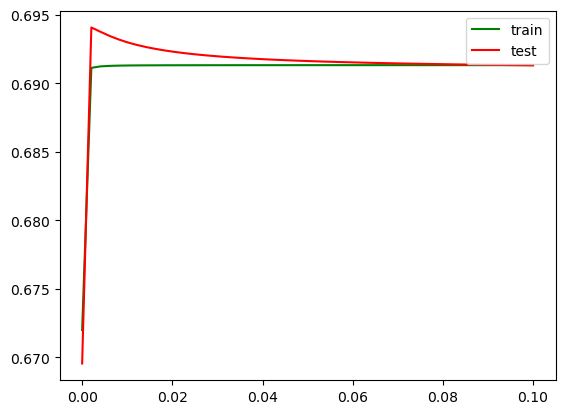

In [260]:
plot_validation_curves(param_grid_LR['LR__C'], search_LR.cv_results_)

In [277]:
model_LR.get_params()

{'C': 0.0024,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [278]:
model_LR.set_params(**{'C':0.0024, 'class_weight': {0:1.0,1:1.8}})

LogisticRegression(C=0.0024, class_weight={0: 1.0, 1: 1.8}, max_iter=1000,
                   random_state=42)

In [227]:
splitter = TimeSeriesSplit(n_splits=4) 
pipe_CB = Pipeline([('scaler', StandardScaler()), ('CB', CatBoostClassifier(random_state=42, verbose=0))])
param_grid_CB = {'CB__depth': [6,8,10],
                 'CB__l2_leaf_reg':[3,5,6],
                 'CB__class_weights':[{0:1.0,1:1.0},{0:1.0,1:1.8}]}

### Передадим в GridSearchCV

search_CB = GridSearchCV(pipe_CB,
                      param_grid_CB,
                      cv=splitter,
                      scoring='roc_auc',
                      verbose=10,return_train_score=True)

search_CB.fit(X_train, y_train)

print(f"Best parameter (CV score={search_CB.best_score_:.5f}):")
print(search_CB.best_params_)

print(f"Best parameter finaly test: {search_CB.score(X_test, y_test)}")

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV 1/4; 1/18] START CB__class_weights={0: 1.0, 1: 1.0}, CB__depth=6, CB__l2_leaf_reg=3
[CV 1/4; 1/18] END CB__class_weights={0: 1.0, 1: 1.0}, CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.728, test=0.653) total time=  17.4s
[CV 2/4; 1/18] START CB__class_weights={0: 1.0, 1: 1.0}, CB__depth=6, CB__l2_leaf_reg=3
[CV 2/4; 1/18] END CB__class_weights={0: 1.0, 1: 1.0}, CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.719, test=0.589) total time=  21.9s
[CV 3/4; 1/18] START CB__class_weights={0: 1.0, 1: 1.0}, CB__depth=6, CB__l2_leaf_reg=3
[CV 3/4; 1/18] END CB__class_weights={0: 1.0, 1: 1.0}, CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.736, test=0.687) total time=  27.4s
[CV 4/4; 1/18] START CB__class_weights={0: 1.0, 1: 1.0}, CB__depth=6, CB__l2_leaf_reg=3
[CV 4/4; 1/18] END CB__class_weights={0: 1.0, 1: 1.0}, CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.727, test=0.715) total time=  32.9s
[CV 1/4; 2/18] START CB__class_

[CV 1/4; 10/18] END CB__class_weights={0: 1.0, 1: 1.8}, CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.729, test=0.651) total time=  19.9s
[CV 2/4; 10/18] START CB__class_weights={0: 1.0, 1: 1.8}, CB__depth=6, CB__l2_leaf_reg=3
[CV 2/4; 10/18] END CB__class_weights={0: 1.0, 1: 1.8}, CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.719, test=0.613) total time=  24.6s
[CV 3/4; 10/18] START CB__class_weights={0: 1.0, 1: 1.8}, CB__depth=6, CB__l2_leaf_reg=3
[CV 3/4; 10/18] END CB__class_weights={0: 1.0, 1: 1.8}, CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.736, test=0.685) total time=  31.4s
[CV 4/4; 10/18] START CB__class_weights={0: 1.0, 1: 1.8}, CB__depth=6, CB__l2_leaf_reg=3
[CV 4/4; 10/18] END CB__class_weights={0: 1.0, 1: 1.8}, CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.728, test=0.718) total time=  35.2s
[CV 1/4; 11/18] START CB__class_weights={0: 1.0, 1: 1.8}, CB__depth=6, CB__l2_leaf_reg=5
[CV 1/4; 11/18] END CB__class_weights={0: 1.0, 1: 1.8}, CB__depth=6, CB__l2_leaf_reg

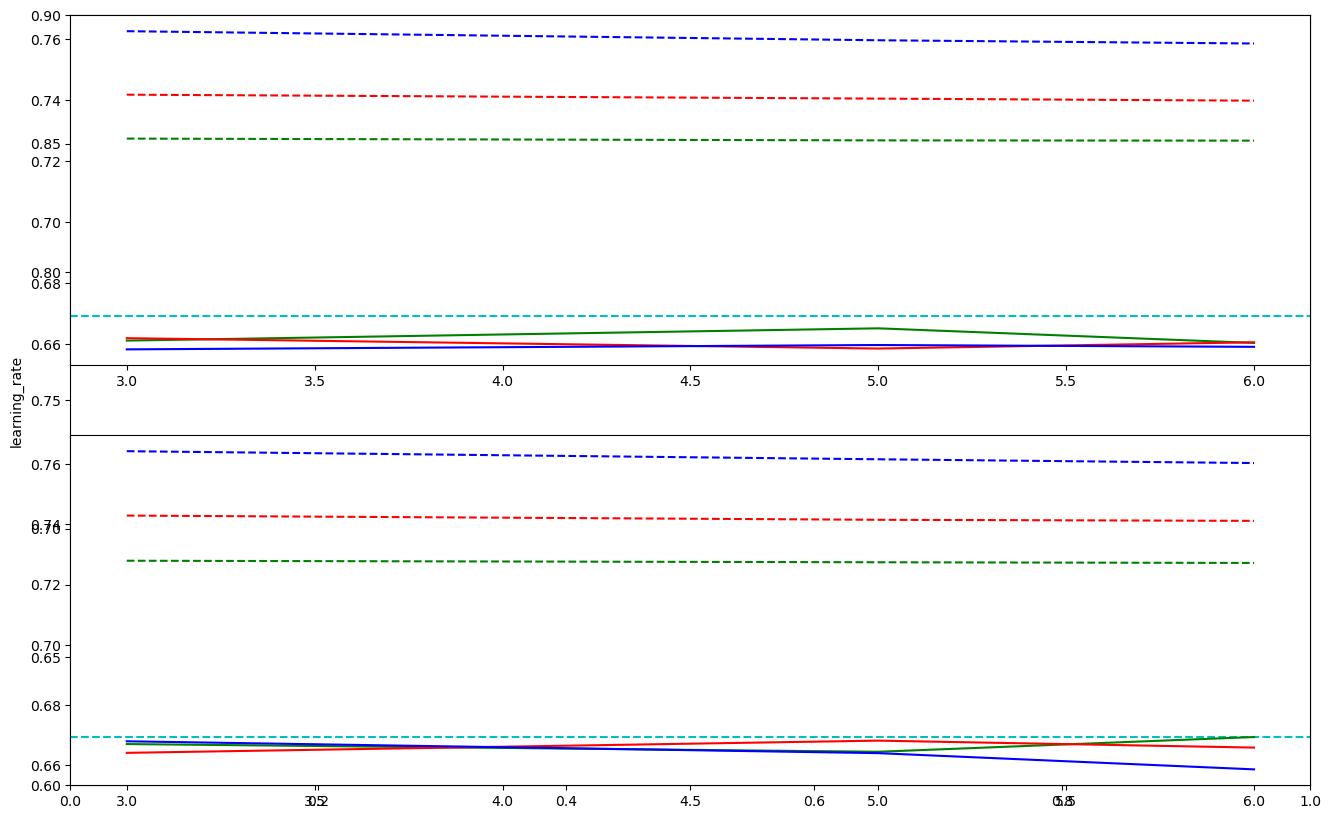

In [249]:
fig = plt.figure()
fig.set_size_inches(16, 10)
plt.ylim(0.6, 0.9)

plt.ylabel('ROC-AUC')
ax_1 = fig.add_subplot(2,1,1)
plt.axhline (y=max(search_CB.cv_results_['mean_test_score']), color='c', linestyle='--')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_train_score'])[:3], '--', label='train', color='green')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_test_score'])[:3], '-', label='test', color='green')

plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_train_score'])[3:6], '--', label='train', color='red')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_test_score'])[3:6], '-', label='test', color='red')

plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_train_score'])[6:9], '--', label='train', color='b')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_test_score'])[6:9], '-', label='test', color='b')


ax_2 = fig.add_subplot(2,1,2)
plt.axhline (y=max(search_CB.cv_results_['mean_test_score']), color='c', linestyle='--')


plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_train_score'])[9:12], '--', label='train', color='green')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_test_score'])[9:12], '-', label='test', color='green')


plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_train_score'])[12:15], '--', label='train', color='red')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_test_score'])[12:15], '-', label='test', color='red')


plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_train_score'])[15:], '--', label='train', color='b')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_test_score'])[15:], '-', label='test', color='b')






In [281]:
model_CB.get_params()

{'verbose': 0,
 'random_state': 42,
 'class_weights': {0: 1.0, 1: 1.8},
 'depth': 6,
 'l2_leaf_reg': 6}

In [280]:
model_CB.set_params(**{'class_weights': {0: 1.0, 1: 1.8}, 'depth': 6, 'l2_leaf_reg': 6})

In [291]:
results_train_with_set = []
results_test_with_set = []
for model  in (model_LR, model_CB):
    model.fit(X_train, y_train)
    score_train = roc_auc_score(y_train, model.predict(X_train))
    score_test = roc_auc_score(y_test, model.predict(X_test))
    results_train_with_set.append(score_train)
    results_test_with_set.append(score_test)
    print(f'{model.__class__.__name__} ROC_AUC: train - {score_train:.3f} test - {score_test:.3f}')

LogisticRegression ROC_AUC: train - 0.631 test - 0.692
CatBoostClassifier ROC_AUC: train - 0.671 test - 0.710


In [295]:
model_LR.get_params(),model_CB.get_params()

({'C': 0.0024,
  'class_weight': {0: 1.0, 1: 1.8},
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 1000,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': 42,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 {'verbose': 0,
  'random_state': 42,
  'class_weights': {0: 1.0, 1: 1.8},
  'depth': 6,
  'l2_leaf_reg': 6})

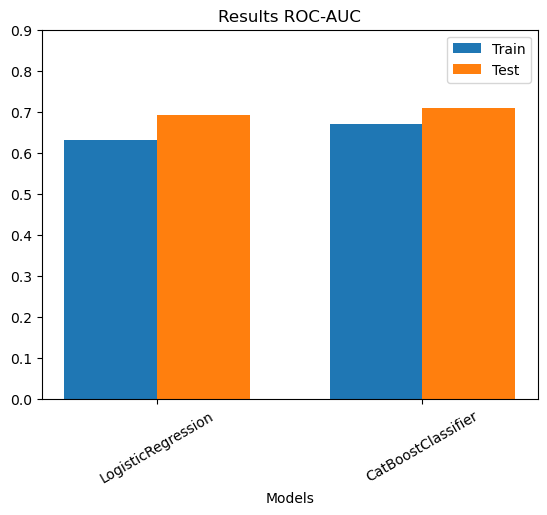

In [302]:


bar_width = 0.35
index = np.arange(len(['LogisticRegression','CatBoostClassifier']))


plt.bar(index, results_train_with_set, width=bar_width, label='Train')
plt.bar(index + bar_width, results_test_with_set, width=bar_width, label='Test')


plt.title('Results ROC-AUC')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, ['LogisticRegression','CatBoostClassifier'], rotation=30)
plt.ylim(0.0, 0.9)

plt.legend()


plt.show('Train','Test')